# financial statements testing grounds


In [1]:
import yfinance as yf
import pandas as pd

In [16]:
import requests
import time


api_key = "TULH49F5XQMU8MQ5"
base_url = "https://www.alphavantage.co/query"

def get_fin_stmt(symbol, function):
    url = base_url + "?function=" + function + "&symbol=" + symbol + "&apikey=" + api_key
    response = requests.get(url)
    time.sleep(20)
    if response.status_code != 200:
        print("Error, cannot retrieve" + function + "for " + symbol)
        return None
    data = response.json()
    if "annualReports" not in data:
        print("Error: No " + function + " data found for " + symbol)
        return None
#     print(data)
    statement_data = data["annualReports"]
    return_dct = {}
    
    return statement_data
statement_dct = {}

statements = {}
stocks = ["ENPH", "IBM"]

statement_types =  ["INCOME_STATEMENT", "BALANCE_SHEET", "CASH_FLOW","EARNINGS"]
for stock in stocks:
    statements[stock] = {}
    for statement_type in statement_types:
        statement_key = statement_type.split("_")[0]
        statements[stock][statement_key] = {}
        try:
            fin_statement = get_fin_stmt(stock, statement_type)
            for annual_data in fin_statement:
                date = annual_data["fiscalDateEnding"]

                statements[stock][statement_key][date] = annual_data
            #statements[stock][statement_key] = pd.DataFrame(income_statements[stock])
        except:
            print("Error retrieving " + statement_type + " for " + stock)


Error retrieving INCOME_STATEMENT for ENPH
Error retrieving BALANCE_SHEET for ENPH
Error retrieving CASH_FLOW for ENPH
Error: No EARNINGS data found for ENPH
Error retrieving EARNINGS for ENPH
Error retrieving INCOME_STATEMENT for IBM
Error retrieving BALANCE_SHEET for IBM
Error retrieving CASH_FLOW for IBM
Error: No EARNINGS data found for IBM
Error retrieving EARNINGS for IBM


In [27]:
plot_df = pd.DataFrame(statements["ENPH"]["BALANCE"]).T
plot_df

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
2022-12-31,2022-12-31,USD,3084280000,2264271000,473244000,1612843000,149708000,440896000,921000000,111367000,...,90892000,1199465000,1290357000,331495000,43520000,825573000,None,17335000,1000,136441000
2021-12-31,2021-12-31,USD,2079256000,1462461000,119316000,1016651000,74400000,333626000,686378000,82167000,...,86052000,951594000,1037646000,173477000,16530000,430168000,None,-405737000,1000,133894000
2020-12-31,2020-12-31,USD,1200102000,933064000,679379000,679379000,41764000,182165000,319024000,42985000,...,325967000,4898000,330865000,83260000,17042000,483993000,None,-51186000,1000,128962000
2019-12-31,2019-12-31,USD,713223000,499657000,251409000,251409000,32056000,145413000,255653000,28936000,...,2884000,102659000,105543000,54000000,11817000,272212000,None,-185181000,1000,123109000
2018-12-31,2018-12-31,USD,339937000,222302000,106237000,106237000,16267000,78938000,151783000,20998000,...,28155000,81628000,109783000,37093000,3250000,7776000,None,-346302000,1000,107035000


In [19]:
import matplotlib.pyplot as plt


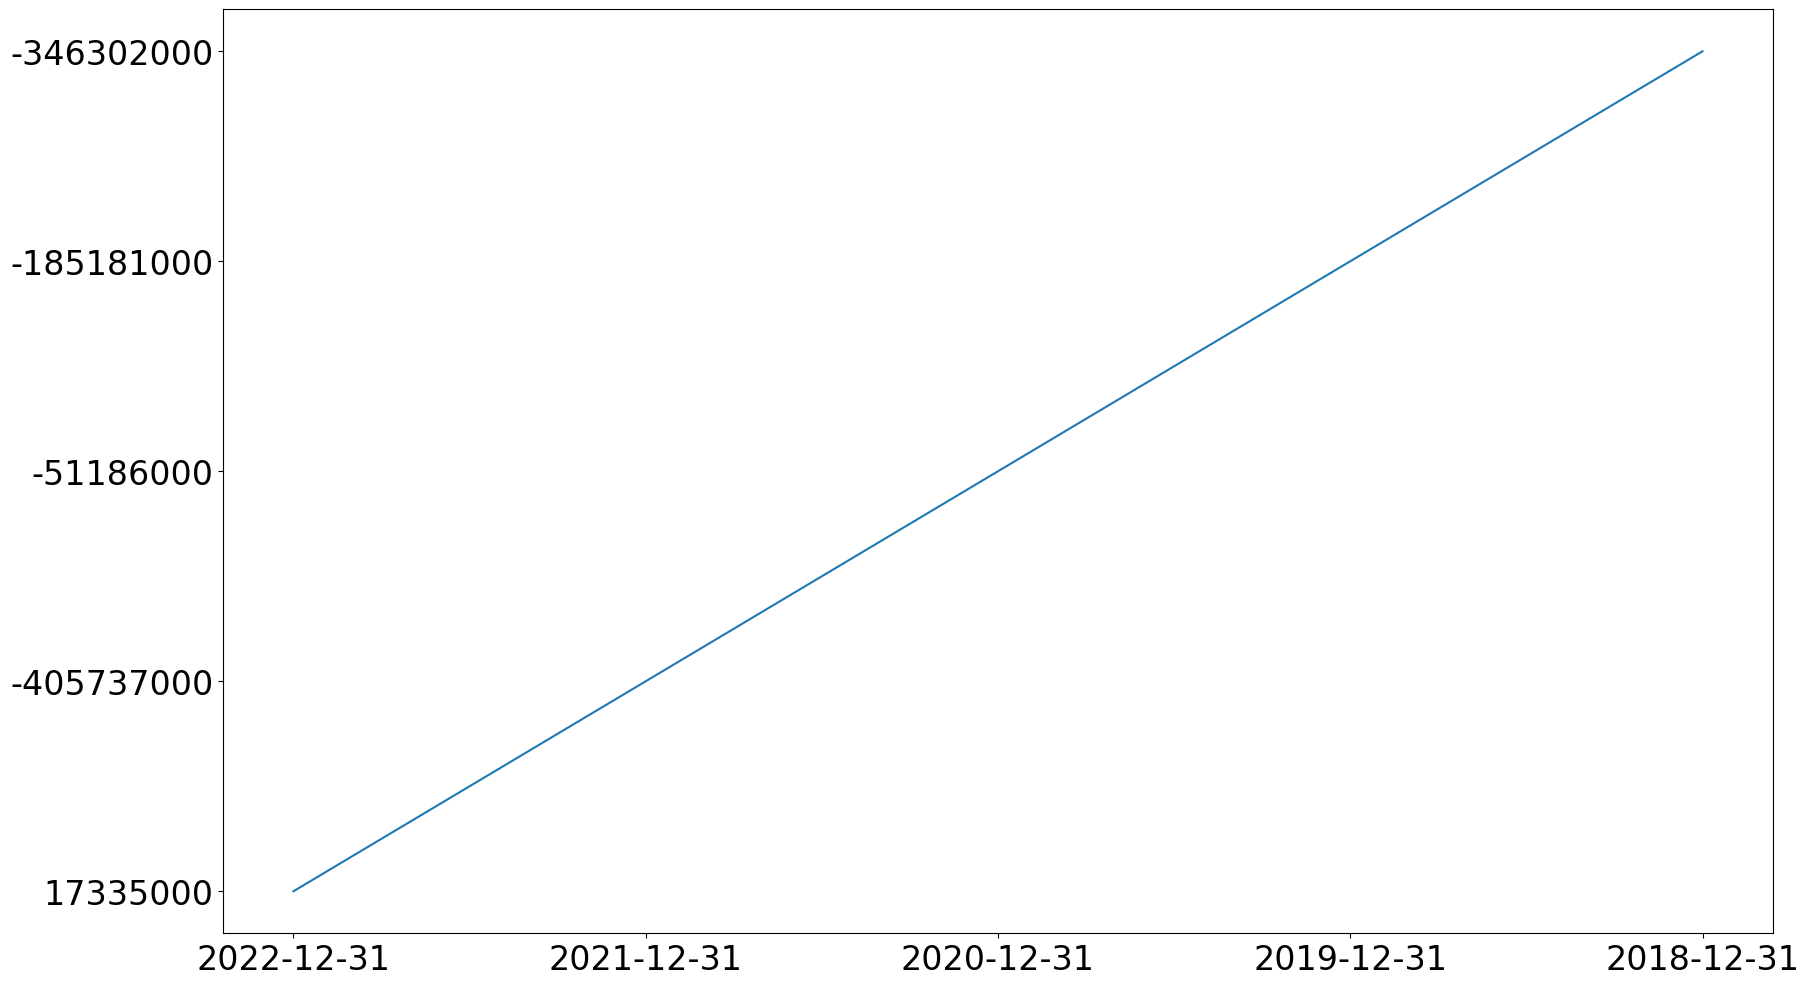

In [29]:
plt.rcParams.update({"font.size":24})

fig, ax = plt.subplots(figsize = (20,12))

ax.plot(plot_df["retainedEarnings"])

In [5]:
#data_dct = {}
#for json_dct in ENPH_IS:
#     date = json_dct["fiscalDateEnding"]
#    data_dct[date] = json_dct
#
#pd.DataFrame(data_dct).T

In [ ]:
data

In [ ]:
type(data)

import requests

# API key for Alpha Vantage
api_key = 'YOUR_API_KEY'

# Base URL for Alpha Vantage API
base_url = 'https://www.alphavantage.co/query'

# Ticker symbol for AAPL
symbol = 'AAPL'

# Initialize the data dictionary
data = {}

# Function to retrieve financial statement data for a given symbol and statement type
def get_financial_statement(symbol, statement_type):
    # Build the URL for the API call
    url = base_url + '?function=' + statement_type + '&symbol=' + symbol + '&apikey=' + api_key

    # Make the API call
    response = requests.get(url)

    # Check if the API call was successful
    if response.status_code != 200:
        print("Error: Unable to retrieve " + statement_type + " for " + symbol)
        return None

    # Extract the financial statement data from the API response
    data = response.json()
    statement_data = data['annualReports']

    return statement_data

# Retrieve and store the income statement for AAPL
income_statement = get_financial_statement(symbol, 'INCOME_STATEMENT')
data[symbol] = {'Income Statement': income_statement}

# Retrieve and store the balance sheet for AAPL
balance_sheet = get_financial_statement(symbol, 'BALANCE_SHEET')
data[symbol]['Balance Sheet'] = balance_sheet

# Retrieve and store the cash flow statement for AAPL
cash_flow = get_financial_statement(symbol, 'CASH_FLOW')
data[symbol]['Cash Flow'] = cash_flow

# Print the retrieved data
print(data[symbol]['Income Statement'])
print(data[symbol]['Balance Sheet'])
print(data[symbol]['Cash Flow'])
